In [ ]:
!pip install -q pandas matplotlib numpy
!pip install scikit-learn

Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


# Praktikum 3

**Pembuatan Dataset Sintetis**

Untuk mempelajari DBSCAN, kita akan membuat dataset sederhana berupa 3 klaster buatan menggunakan fungsi  make_blobs  dari Scikit-Learn.

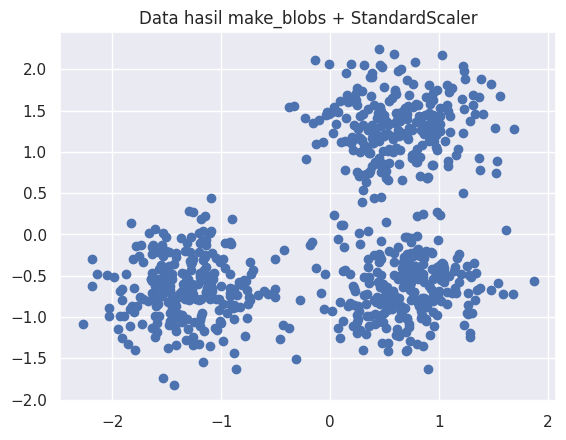

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# buat dataset dengan 3 cluster
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# normalisasi
X = StandardScaler().fit_transform(X)

# plot hasil
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data hasil make_blobs + StandardScaler")
plt.show()


**Compute DBSCAN**

Sekarang kita terapkan DBSCAN pada data tersebut.

Label yang ditetapkan oleh DBSCAN dapat diakses melalui atribut labels_. Titik data yang dianggap noise akan diberi label khusus.


- eps=0.3 → jarak maksimum antar titik untuk dianggap tetangga.

- min_samples=10 → jumlah minimum titik dalam radius eps agar dianggap area padat (core sample).

- Label hasil klasterisasi tersedia di labels. Nilai -1 berarti titik tersebut dianggap noise atau outlier.

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# misal X sudah tersedia dari make_blobs / dataset sebelumnya
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# jumlah cluster (mengabaikan noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18
